# <div align="center"> SPECIAL TOPICS III </div>
## <div align="center"> Data Science for Social Scientists  </div>
### <div align="center"> ECO 4199 </div>
#### <div align="center">Class 7 - Model Selection</div>
<div align="center"> Fabien Forge, (he/him)</div>

# Roadmap

- In the last lecture we saw the risk associated with overfitting. 
- Although we discussed the case of polynomial regressions, the risk of overfitting is common to all learning models
- This risk usually increases with the number of parameters
$$ Y = f(\mathbf{X}) + \varepsilon$$
- Regression and classification used tools that you were already familiar with (at least to some extent)
- But we only scratched the surface of what these functions may look like
- Today, we will keep using these tools with a different goal in mind
- This goal will require new tools...

## Dealing with overfitting
- Last lecture, we saw the issues associated with overfitting
- You may think that the issue came from allowing for (undue) higher degrees in our model
- But the issue is broader than this.
- We used a model in which Y was related to $X$ and $X^2$ not $X^n$ for n>2
- In other words we were using too many predictors

## RSS and MSE
- the training set MSE is generally an underestimate of the test MSE. 
    - Recall that MSE = RSS/n. 
- When we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS (but not the test RSS) is as small as possible. 
- In particular, the training error will decrease as more variables are included in the model, but the test error may not.
- Therefore, training set RSS and training set R2 cannot be used to select from among a set of models with different numbers of variables.
- However, a number of techniques for adjusting the training error for the model size are available.

# Subset Selection
$$Y = \beta_0+\beta_1X_1+\beta_2X_2+ ... + \beta_pX_p + \epsilon$$
- The issue it that adding predictors will always weakly improve the in sample prediction
    - But at the expense of out of sample prediction
- It is therefore important to limit the number of predictors to those actually related to Y
- __Subset Selection__ _is the process of identifying the p predictors actually related to Y._

## Best Subset Selection
- Here is the algorithm to select the best subset given a dataset with p predictors
- We will apply this algorithm to the Credit dataset

Algorithm:

1. Let $\mathscr{M}_0$ denote the null model , which contains no predictors. This
model simply predicts the sample mean for each observation.
2. For k = 1, 2, . . .p:
    - a. Fit all ${P\choose k}$ containing exactly $k$ predictors
    - b. Pick the best among these ${P\choose k}$ and call it $\mathscr{M}_k$. Here best is defined as having the smallest RSS, or equivalently largest R2.
3. Select a single best model from among $\mathscr{M}_0$, . . . ,$\mathscr{M}_p$ using crossvalidated prediction error (MSE), AIC, BIC, or adjusted $R^2$

### The null model
- Let's start with the null model
- This a model using no predictors and a single parameter: the intercept

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

import sklearn.linear_model as skl_lm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

 
from itertools import permutations


folderPath="~/Dropbox/Data Science for Social Scientists/Classes/Class 7 – Model Selection/"

In [4]:
df=pd.read_csv(folderPath+"Credit.csv" ,usecols=list(range(1,12)))
df['Gender']=df['Gender'].replace({" Male":0,  "Female":1})
df['Student']=df['Student'].replace({"No":0,  "Yes":1})
df['Married']=df['Married'].replace({"No":0,  "Yes":1})
df=df.join(pd.get_dummies(df['Ethnicity'], drop_first=True))
df.pop("Ethnicity")
display(df.shape)
df.head()

(400, 12)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
0,14.891,3606,283,2,34,11,0,0,1,333,0,1
1,106.025,6645,483,3,82,15,1,1,1,903,1,0
2,104.593,7075,514,4,71,11,0,0,0,580,1,0
3,148.924,9504,681,3,36,11,1,0,0,964,1,0
4,55.882,4897,357,2,68,16,0,0,1,331,0,1


$\mathscr{M}_0$

In [5]:
# M0
results = smf.ols('Balance ~ 1 ', data=df).fit()
# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 09 Mar 2021   Prob (F-statistic):                nan
Time:                        13:43:44   Log-Likelihood:                -3019.4
No. Observations:                 400   AIC:                             6041.
Df Residuals:                     399   BIC:                             6045.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    520.0150     22.988     22.621      0.0

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


In [6]:
# get y and X
y=df['Balance'] # y
X=df.loc[:,~df.columns.str.contains('Balance')] # X
X['intercept']=1
X.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Asian,Caucasian,intercept
0,14.891,3606,283,2,34,11,0,0,1,0,1,1
1,106.025,6645,483,3,82,15,1,1,1,1,0,1
2,104.593,7075,514,4,71,11,0,0,0,1,0,1
3,148.924,9504,681,3,36,11,1,0,0,1,0,1
4,55.882,4897,357,2,68,16,0,0,1,0,1,1


$\mathscr{M}_1$

In [40]:
for k in permutations(list(range(X.shape[1]-1)), 2):
    print(df.iloc[:,list(k)])

      Income  Limit
0     14.891   3606
1    106.025   6645
2    104.593   7075
3    148.924   9504
4     55.882   4897
..       ...    ...
395   12.096   4100
396   13.364   3838
397   57.872   4171
398   37.728   2525
399   18.701   5524

[400 rows x 2 columns]
      Income  Rating
0     14.891     283
1    106.025     483
2    104.593     514
3    148.924     681
4     55.882     357
..       ...     ...
395   12.096     307
396   13.364     296
397   57.872     321
398   37.728     192
399   18.701     415

[400 rows x 2 columns]
      Income  Cards
0     14.891      2
1    106.025      3
2    104.593      4
3    148.924      3
4     55.882      2
..       ...    ...
395   12.096      3
396   13.364      5
397   57.872      5
398   37.728      1
399   18.701      5

[400 rows x 2 columns]
      Income  Age
0     14.891   34
1    106.025   82
2    104.593   71
3    148.924   36
4     55.882   68
..       ...  ...
395   12.096   32
396   13.364   65
397   57.872   67
398   37.728   4

     Education  Rating
0           11     283
1           15     483
2           11     514
3           11     681
4           16     357
..         ...     ...
395         13     307
396         17     296
397         12     321
398         13     192
399          7     415

[400 rows x 2 columns]
     Education  Cards
0           11      2
1           15      3
2           11      4
3           11      3
4           16      2
..         ...    ...
395         13      3
396         17      5
397         12      5
398         13      1
399          7      5

[400 rows x 2 columns]
     Education  Age
0           11   34
1           15   82
2           11   71
3           11   36
4           16   68
..         ...  ...
395         13   32
396         17   65
397         12   67
398         13   44
399          7   64

[400 rows x 2 columns]
     Education  Gender
0           11       0
1           15       1
2           11       0
3           11       1
4           16       0
..        

In [7]:
# initiate empty list to store R2
R2= 0
best_predictor="none"
X=df.loc[:,~df.columns.str.contains('Balance')]
y=df.loc[:,df.columns.str.contains('Balance')]

# for each predictor in X
for k in range(X.shape[1]-1): # minus 1 because last column is intercept
    results = sm.OLS(y, X.iloc[:,[k,-1]]).fit() # fit predictor in position p and intercept (in last position, -1)
    print(f"R\u00b2 for predictor {X.columns[k]} is {round(results.rsquared,6):f}")
    if results.rsquared>R2:
        R2=results.rsquared ; best_predictor=X.columns[k]
print("\nBest predictor for M1 is: {} with {}.".format(best_predictor,round(R2,3)))

R² for predictor Income is 0.622637
R² for predictor Limit is 0.858626
R² for predictor Rating is 0.845239
R² for predictor Cards is 0.506125
R² for predictor Age is 0.516919
R² for predictor Education is 0.533170
R² for predictor Gender is 0.385951
R² for predictor Student is 0.370826
R² for predictor Married is 0.400392
R² for predictor Asian is 0.416977

Best predictor for M1 is: Limit with 0.859.


In [18]:
DFs=[]
#for p in range(X.shape[1]): # uncomment here if you want to do it for all RUN AT YOUR OWN RISK
for p in range(8):
    R2=0
    best_predictor="none"
    R2_list=[]; adj_R2_list=[] ; aic=[] ; bic=[] ; models=[]
    for k in permutations(list(range(X.shape[1]-1)), p):
        model=list(k)
        model.append(1)

        results = sm.OLS(y, X.iloc[:,model]).fit() # fit predictors from model
        # append statistics to list
        R2_list.append(results.rsquared) ; adj_R2_list.append(results.rsquared_adj) 
        aic.append(results.aic); bic.append(results.bic) ; models.append(','.join(X.columns[model]))

        if results.rsquared_adj>R2:
            model.pop(-1)
            mm=model
            R2=results.rsquared_adj 
    
    print("Best predictor for M{} is: {} with {}.".format(p,', '.join(X.columns[mm]),round(R2,3)))
    DFs.append(pd.DataFrame(data={'R2':R2_list,'Adjusted R2':adj_R2_list, "AIC":aic, "BIC":bic,'Predictors':p,'model':models}))

    
dd=pd.concat(DFs)
dd.head()

Best predictor for M0 is:  with 0.853.
Best predictor for M1 is: Income with 0.887.
Best predictor for M2 is: Income, Education with 0.93.
Best predictor for M3 is: Income, Education, Student with 0.963.
Best predictor for M4 is: Income, Age, Education, Student with 0.969.
Best predictor for M5 is: Income, Age, Education, Gender, Student with 0.969.
Best predictor for M6 is: Income, Age, Education, Gender, Student, Married with 0.97.
Best predictor for M7 is: Income, Rating, Cards, Age, Education, Gender, Student with 0.97.


,R2,Adjusted R2,AIC,BIC,Predictors,model
0,0.853070,0.852701,5603.701685,5607.693150,0,Limit
0,0.887830,0.887266,5497.724000,5505.706929,1,"Income,Limit"
1,0.853070,0.852701,5603.701685,5607.693150,1,"Limit,Limit"
2,0.869180,0.868523,5559.246315,5567.229245,1,"Rating,Limit"
3,0.860941,0.860242,5583.678290,5591.661219,1,"Cards,Limit"


## Computational challenge
- Best subset selection is a simple and conceptually appealing 
- But the number of possible models that must be considered grows rapidly as p increases. 
- In general, there are 2p models that involve subsets of p predictors. 
    - So if p = 10, then there are approximately 1,000 possible models to be considered!
    - So if p = 20, then there are more than 1,000,000 possible models to be considered!!!

![title](credit_10predictors.png)

In [30]:
dd_best=dd.groupby(['Predictors']).agg({"R2":np.max, "Adjusted R2":np.max, "AIC":np.min, "BIC":np.min}).reset_index()
dd_best

,Predictors,R2,Adjusted R2,AIC,BIC
0,0,0.853070,0.852701,5603.701685,5607.693150
1,1,0.887830,0.887266,5497.724000,5505.706929
2,2,0.930029,0.929500,5310.951656,5322.926050
3,3,0.963672,0.963305,5050.754329,5066.720187
4,4,0.969163,0.968773,4987.198802,5007.156125
5,5,0.969738,0.969277,4981.673448,5005.622236
6,6,0.970217,0.969686,4977.299204,5005.239456
7,7,0.970494,0.969892,4975.549758,5005.239456


## Akaike information criterion (AIC)

- The AIC criterion is defined for a large class of models fit by maximum likelihood. 
    - Recall that OLS regressions are a subset of maximum likelihood
- For a fitted least squares model containing p predictors
$$\large \text{AIC}=\frac{1}{n\hat{\sigma}^2}(\text{RSS} + 2p\hat{\sigma}^2)$$
- Also, recall that MSE is defined as $\frac{1}{n} \text{RSS}$

## Akaike information criterion (AIC), continued
- $\hat{\sigma}^2$ is an estimate of the variance of the error $\varepsilon$ associated with each response measurement 
- $2p\hat{\sigma}^2$  is a statistical penalty on the training RSS
    - In order to account for the fact that training error tends to underestimate the test error
    - The penalty increases with the number of predictors $p$ to adjust for the corresponding decrease in training RSS
- Smaller values of AIC indicates better fit

## Bayesian information criterion (BIC)
$$\large \text{BIC}=\frac{1}{n\hat{\sigma}^2}(\text{RSS} + \log(n)p\hat{\sigma}^2)$$
- $n$ represents the number of observations
- Notice that BIC replaces the $2p\hat{\sigma}^2$ used by AIC with a $\log(n)p\hat{\sigma}^2$
term, where n is the number of observations
- Since $\log(n) > 2$ for any n > 7, the BIC statistic generally places a heavier penalty on models with many variables compared with AIC 
- Here too, smaller values of AIC indicates better fit

## Adjusted $R^2$
$$\large \text{Adjusted R}^2 = 1- \frac{\frac{\text{RSS}}{n-p-1}}{\frac{TSS}{n-1}}$$
- Recall that the usual $R^2= 1- \frac{\text{RSS}}{\text{TSS}}$
- Also $n > p$ always (at least for now)
- Since RSS always decreases as more variables are added to the model, the $R^2$ always increases as more variables are added. 
- For a least squares model with p variables, the adjusted R2 statistic is calculated as
- Large values of adjusted $R^2$ indicate a model with small error. 
- Maximizing the adjusted $R^2$ is equivalent to minimizing $\frac{\text{RSS}}{n-p-1}$
    - While RSS always decreases as the number of variables in the model increases
    - $\frac{\text{RSS}}{n-p-1}$ may increase or decrease, due to the presence of p in the denominator.
- The intuition behind the adjusted $R^2$ is that once all of the correct variables have been included in the model, adding additional noise variables

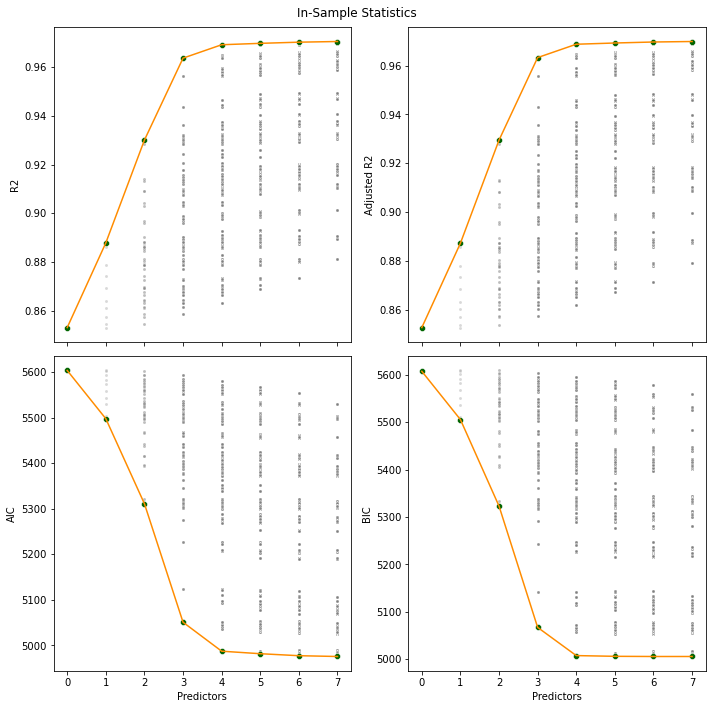

In [32]:
fig, axes = plt.subplots(2,2, figsize=(10,10),sharex=True)
axes = axes.ravel() # access axes with a single position instead of 2
for i, statistics in enumerate(['R2',"Adjusted R2","AIC","BIC"]):
    sns.scatterplot(x='Predictors',y=statistics,data=dd,ax=axes[i], color='gray',marker='.',alpha=.3)
    sns.lineplot(x='Predictors',y=statistics,data=dd_best,ax=axes[i], color='darkorange')
    sns.scatterplot(x='Predictors',y=statistics,data=dd_best,ax=axes[i], color='darkgreen')
    axes[i].set_ylabel(statistics)
    axes[i].set_xticks(np.arange(p+1))
    
fig.suptitle("In-Sample Statistics")
fig.tight_layout()
plt.show()

### Step 3 of Best Subset Selection
- You can think of this stage in terms of last lecture:
    - You have many models (last time many polynomial models), one for each p
    - But they all maximize the in sample fit
- In step 3, you can do this based on the adjusted-$R^2$, AIC, BIC or you can use CV techniques to find the model that gives the __best out of sample prediction__

In [33]:
dd['best']=dd.groupby(['Predictors'])['Adjusted R2'].transform(np.max)
dd_best2=dd.loc[dd['Adjusted R2']==dd['best']].groupby('Predictors').first().reset_index()
dd_best2.head(10)

,Predictors,R2,Adjusted R2,AIC,BIC,model,best
0,0,0.853070,0.852701,5603.701685,5607.693150,Limit,0.852701
1,1,0.887830,0.887266,5497.724000,5505.706929,"Income,Limit",0.887266
2,2,0.930029,0.929500,5310.951656,5322.926050,"Income,Education,Limit",0.929500
3,3,0.963672,0.963305,5050.754329,5066.720187,"Income,Education,Student,Limit",0.963305
4,4,0.969163,0.968773,4987.198802,5007.156125,"Income,Age,Education,Student,Limit",0.968773
5,5,0.969738,0.969277,4981.673448,5005.622236,"Income,Age,Education,Gender,Student,Limit",0.969277
6,6,0.970217,0.969686,4977.299204,5005.239456,"Income,Age,Education,Gender,Student,Married,Limit",0.969686
7,7,0.970494,0.969892,4975.549758,5007.481475,"Income,Rating,Cards,Age,Education,Gender,Stude...",0.969892


In [34]:
models=["intercept",["Rating","intercept"], 
        ["Income","Rating","intercept"],
        ["Income","Rating","Student","intercept"],
        ["Income","Limit","Cards","Student","intercept"],
        ["Income","Limit","Rating","Cards","Student","intercept"],
        ["Income","Limit","Rating","Cards","Age","Student","intercept"],
        ["Income","Limit","Rating","Cards","Age","Gender","Student","intercept"]]

In [23]:
df['intercept']=1

In [35]:
# Best number of predictors using Cross Validation
# use best model from precedent exercise to speed up the code
kfold=5
DFs=[]
kf = KFold(n_splits=kfold, random_state=1706, shuffle=True)

for i,m in enumerate(models):
    MSEs=[] # empty list of MSE scores
    X=df[m].values
    y=df['Balance'].values
    for train_index, test_index in kf.split(X):
        if i==0:
            X_train, X_test = X[train_index].reshape(-1, 1), X[test_index].reshape(-1, 1)
        else:
            X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # regression
        reg = LinearRegression() # initiate the regression class
        reg.fit(X_train,y_train) # fit the data
        # Out of Sample MSE:
        mse=mean_squared_error(y_test, reg.predict(X_test))
        MSEs.append(mse)
    DFs.append(pd.DataFrame({'Predictors':i,'MSE':MSEs}))
    
MSE_scores=pd.concat(DFs)
mse=MSE_scores.groupby('Predictors').mean().reset_index()    
mse

,Predictors,MSE
0,0,211013.906496
1,1,54618.341889
2,2,26576.027671
3,3,10849.538914
4,4,10103.583912
5,5,9981.065488
6,6,9914.381104
7,7,9944.810974


In [36]:
dd_best=dd_best.merge(mse, on='Predictors')
dd_best.head()

,Predictors,R2,Adjusted R2,AIC,BIC,MSE
0,0,0.853070,0.852701,5603.701685,5607.693150,211013.906496
1,1,0.887830,0.887266,5497.724000,5505.706929,54618.341889
2,2,0.930029,0.929500,5310.951656,5322.926050,26576.027671
3,3,0.963672,0.963305,5050.754329,5066.720187,10849.538914
4,4,0.969163,0.968773,4987.198802,5007.156125,10103.583912


Best number of parameters for
Adjusted R-square: 7
AIC: 7
BIC: 6
10-fold CV:6 


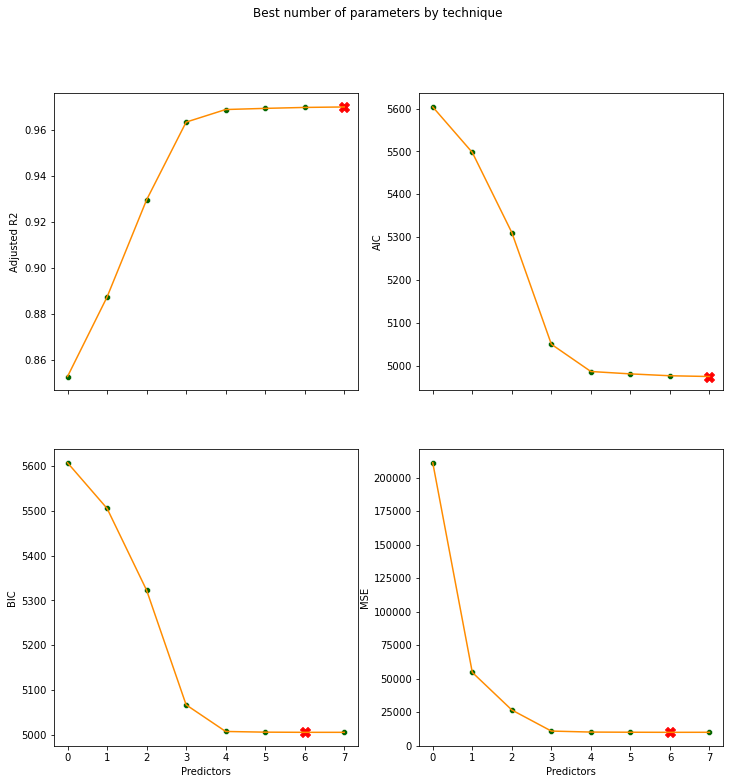

In [37]:
# Best number of predictors for other statistics
adj_R2_best=int(dd_best2.loc[dd_best2['Adjusted R2']==dd_best2['Adjusted R2'].max(),'Predictors'])
aic_best=int(dd_best2.loc[dd_best2['AIC']==dd_best2['AIC'].min(),'Predictors'])
bic_best=int(dd_best2.loc[dd_best2['BIC']==dd_best2['BIC'].min(),'Predictors'])
mse_best=int(mse.loc[mse.MSE==mse.MSE.min(),'Predictors'])
best_preds=[adj_R2_best,aic_best,bic_best,mse_best]
print(f"Best number of parameters for\nAdjusted R-square: {adj_R2_best}\nAIC: {aic_best}\nBIC: {bic_best}\n10-fold CV:{mse_best} ")

fig, axes = plt.subplots(2,2, figsize=(12,12),sharex=True)
axes = axes.ravel() # access axes with a single position instead of 2
for i, statistics in enumerate(["Adjusted R2","AIC","BIC", "MSE"]):
    sns.lineplot(x='Predictors',y=statistics,data=dd_best,ax=axes[i], color='darkorange')
    sns.scatterplot(x='Predictors',y=statistics,data=dd_best,ax=axes[i], color='darkgreen')
    # axes[i].axvline(best_preds[i], color='k')
    axes[i].scatter(x=best_preds[i],y=float(dd_best.loc[best_preds[i],statistics]),marker='X',color='red',s=100)
    axes[i].set_ylabel(statistics)
    axes[i].set_xticks(np.arange(p+1))
fig.suptitle("Best number of parameters by technique")
plt.show()

Best number of parameters for
Adjusted R-square: 7
AIC: 7
BIC: 6
10-fold CV:6 


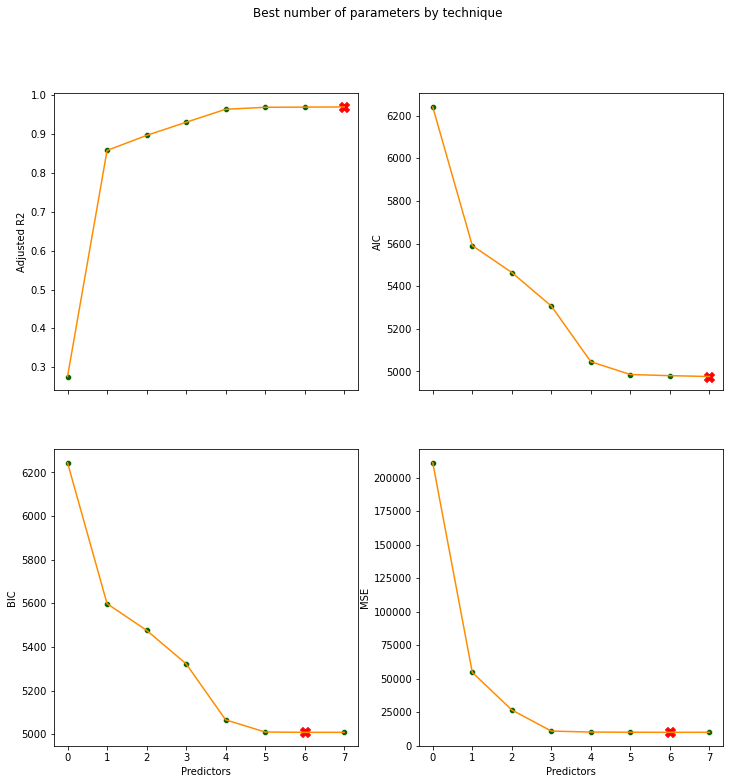

In [24]:
# Best number of predictors for other statistics
adj_R2_best=int(dd_best2.loc[dd_best2['Adjusted R2']==dd_best2['Adjusted R2'].max(),'Predictors'])
aic_best=int(dd_best2.loc[dd_best2['AIC']==dd_best2['AIC'].min(),'Predictors'])
bic_best=int(dd_best2.loc[dd_best2['BIC']==dd_best2['BIC'].min(),'Predictors'])
mse_best=int(mse.loc[mse.MSE==mse.MSE.min(),'Predictors'])
best_preds=[adj_R2_best,aic_best,bic_best,mse_best]
print(f"Best number of parameters for\nAdjusted R-square: {adj_R2_best}\nAIC: {aic_best}\nBIC: {bic_best}\n10-fold CV:{mse_best} ")

fig, axes = plt.subplots(2,2, figsize=(12,12),sharex=True)
axes = axes.ravel() # access axes with a single position instead of 2
for i, statistics in enumerate(["Adjusted R2","AIC","BIC", "MSE"]):
    sns.lineplot(x='Predictors',y=statistics,data=dd_best,ax=axes[i], color='darkorange')
    sns.scatterplot(x='Predictors',y=statistics,data=dd_best,ax=axes[i], color='darkgreen')
    # axes[i].axvline(best_preds[i], color='k')
    axes[i].scatter(x=best_preds[i],y=float(dd_best.loc[best_preds[i],statistics]),marker='X',color='red',s=100)
    axes[i].set_ylabel(statistics)
    axes[i].set_xticks(np.arange(p+1))
fig.suptitle("Best number of parameters by technique")
plt.show()

## Solutions to computational challenge: Forward Stepwise Selection

1. Let $\mathscr{M}_0$ denote the null model, which contains no predictors.
2. For $k = 0, \dots , p − 1$:
    - (a) Consider all p − k models that augment the predictors in $\mathscr{M}_k$ with one additional predictor.
    - (b) Choose the best among these p − k models, and call it $\mathscr{M}_{k+1}$.
        - Here best is defined as having smallest RSS or highest R2.
3. Select a single best model from among $\mathscr{M}_0$, $\dots$ ,$\mathscr{M}_p$ using crossvalidated prediction error, AIC, BIC, or adjusted R2.

## Solutions to computational challenge: Backward Stepwise Selection

1. Let $\mathscr{M}_p$ denote the full model, which contains all p predictors.
2. For $k = p, p − 1, \dots , 1$:
    - (a) Consider all k models that contain all but one of the predictors in $\mathscr{M}_k$, for a total of k − 1 predictors.
    - (b) Choose the best among these k models, and call it $\mathscr{M}_{k-1}$. 
        - Here best is defined as having smallest RSS or highest $R^2$.
3. Select a single best model from among $\mathscr{M}_0, \dots ,\mathscr{M}_p$ using crossvalidated prediction error, AIC, BIC, or adjusted R2.

## Taking Stock
- Last week we saw the risks associated with overfitting
- This risk increases with the number of parameters
- Different techniques yield different types of subsets but all penalize, one way or another, having too many parameters
- The trade-off therefore is to find the best out of sample prediction using the least number of predictors possible

# Shrinkage Methods
- Think back on the credit dataset
- The data set has a number of predictors, which all seem reasonable
    - All seem to be legitimate predictors of Balance
    - There no variable irrelevant variable
- Instead of our iterative, and long, process it would be nicer to fit all p predictors using a technique that __constrains__ or __regularizes the coefficient estimates__, or equivalently, that shrinks the coefficient estimates towards zero. 
    - Instead of cherry picking parameters we, instead, force the parameters of redundant predictors to be small or zero

# Ridge Regression
- OLS regression for a model with p parameters finds that $\beta_0, \beta_1, ... \beta_p$ that minimize (as you know):
$$\Large \text{RSS} = \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\Big)^2$$


## Ridge Regression, continued
- Ridge regression is very similar to least squares, except that the coefficients ridge are by minimizing a slightly different quantity. 
- In particular, the ridge regression coefficient estimates $\hat{\beta^R}$ are the values that minimize:
\begin{gather}
\Large \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\Big)^2 + \lambda \sum_{j=1}^p\beta_j^2 \\
= \Large\text{RSS} + \lambda \sum_{j=1}^p\beta_j^2
\end{gather}


## Ridge Regression, shrinkage
- $\lambda$ is known as a __tuning parameter__ that is determined outside of the minimization problem
- As with OLS, Ridge regression seeks coefficient estimates that fit the data well (small RSS)
- Unlike OLS, the second term $\lambda \sum_{j=1}^p\beta_j^2$ is small if $\beta_1, ..., \beta_j$ are small ($\beta_0$ not included!)
    - This second term is known as a __shrinkage penalty__
- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
    - When $\lambda$ = 0, the penalty term has no effect, and ridge regression = OLS
    - $\lambda \to \infty$, the impact of the shrinkage penalty grows, and the ridge regression coefficient estimates will approach zero.
- As you will see, the optimal $\lambda$ is given using cross validation

## Standardization of your dataset
- Standardization of datasets is a common requirement for many machine learning estimators implemented see this tutorial in [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html)

- You can transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

- Models such as the Ridge regression assume that all features are centered around zero and have variance in the same order. 
- If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
- In other words, in the OLS regression, multiplying X by a constant c will change $\beta$ to $\frac{\beta}{c}$
- In the Ridge regression, the $\beta^R$ will depend not only on the value of λ, but also on the scaling of the $j^{th}$ predictor

In [41]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian,intercept
0,14.891,3606,283,2,34,11,0,0,1,333,0,1,1
1,106.025,6645,483,3,82,15,1,1,1,903,1,0,1
2,104.593,7075,514,4,71,11,0,0,0,580,1,0,1
3,148.924,9504,681,3,36,11,1,0,0,964,1,0,1
4,55.882,4897,357,2,68,16,0,0,1,331,0,1,1


In [16]:
# import the preprocessing module from sklearn
from sklearn import preprocessing
X_train =df[['Income','Limit','Rating','Student','Cards','Age','Education','Gender','Married','Asian','Caucasian']]
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train.mean(axis=0) , X_train.std(axis=0)

(array([ 1.79856130e-16, -1.59872116e-16,  1.55431223e-17, -5.77315973e-17,
        -1.27675648e-17,  1.77635684e-16,  2.08721929e-16,  4.44089210e-17,
        -2.66453526e-17, -3.55271368e-17,  5.32907052e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

Let's now see what happens to our estimates as the value for $\lambda$ changes

In [17]:
from sklearn.linear_model import Ridge

lambdas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge()
coefs = []

for 𝜆 in lambdas:
    ridge.set_params(alpha=𝜆)
    ridge.fit(X_train, y)
    coefs.append(ridge.coef_)
ridge_results=pd.DataFrame(coefs,columns=['Income','Limit','Rating','Student','Cards','Age','Education','Gender','Married','Asian','Caucasian'])
ridge_results['Lambda']=lambdas  
ridge_results=pd.melt(ridge_results,id_vars=['Lambda'], var_name='Beta', value_name='Estimate')
ridge_results.head()                        


,Lambda,Beta,Estimate
0,5.000000e+09,Income,0.000017
1,3.782317e+09,Income,0.000023
2,2.861184e+09,Income,0.000030
3,2.164381e+09,Income,0.000039
4,1.637275e+09,Income,0.000052


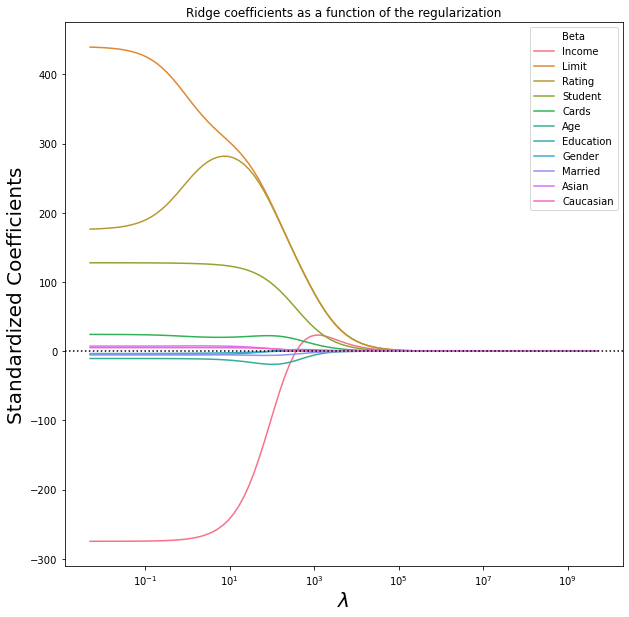

In [18]:
fig, ax =plt.subplots(1,1, figsize=(10,10))
sns.lineplot(x='Lambda', y='Estimate', hue='Beta',data=ridge_results)
ax.set_xscale('log')
ax.axhline(0,color='k',linestyle=":")
plt.axis('tight')
plt.xlabel(r'$\lambda$', fontsize=20)
plt.ylabel('Standardized Coefficients',fontsize=20)
plt.title('Ridge coefficients as a function of the regularization');

## Ridge and Model Selection
- The ridge regression is clearly faster than our best subset methodology
- Note though that we never truly select a model in the sense that we never use a subset of predictors
- Instead, we are shrinking how much they matter in our prediction but use all p predictors (unless λ = ∞).
- This may not be a problem for prediction accuracy, but it can create a challenge in model interpretation in settings in which the number of variables p is quite large. 
- For example, in the Credit data set, it appears that the most important variables are income, limit, rating, and student. 
- So we might wish to build a model including just these predictors. 

## Lasso Regression
- The Lasso regression is an alternative to the Ridge regression as it allows to shrink parmeters to zero
- The lasso regression coefficient estimates $\hat{\beta^L_\lambda}$ are the values that minimize:
\begin{gather}
\Large\text{RSS} + \lambda \sum_{j=1}^p\left|\beta_j\right|
\end{gather}

## Lasso and Model Selection
- As with ridge regression, the lasso shrinks the coefficient estimates towards zero. 
- However, in the case of the lasso, the $\ell_1$ penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the tuning parameter λ is sufficiently large. 
- Hence, much like best subset selection, the lasso performs variable selection.
- We say that the lasso yields __sparse models__ 

In [19]:
from sklearn.linear_model import Lasso

lambdas = 10**np.linspace(10,-2,100)*0.5
lasso = Lasso()
coefs = []

for 𝜆 in lambdas:
    lasso.set_params(alpha=𝜆)
    lasso.fit(X_train, y)
    coefs.append(lasso.coef_)
lasso_results=pd.DataFrame(coefs,columns=['Income','Limit','Rating','Student','Cards','Age','Education','Gender','Married','Asian','Caucasian'])
lasso_results['Lambda']=lambdas  
lasso_results=pd.melt(lasso_results,id_vars=['Lambda'], var_name='Beta', value_name='Estimate')
lasso_results.head()                        


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17920.893738377374, tolerance: 8433.991191000001
  positive)


,Lambda,Beta,Estimate
0,5.000000e+09,Income,0.0
1,3.782317e+09,Income,0.0
2,2.861184e+09,Income,0.0
3,2.164381e+09,Income,0.0
4,1.637275e+09,Income,0.0


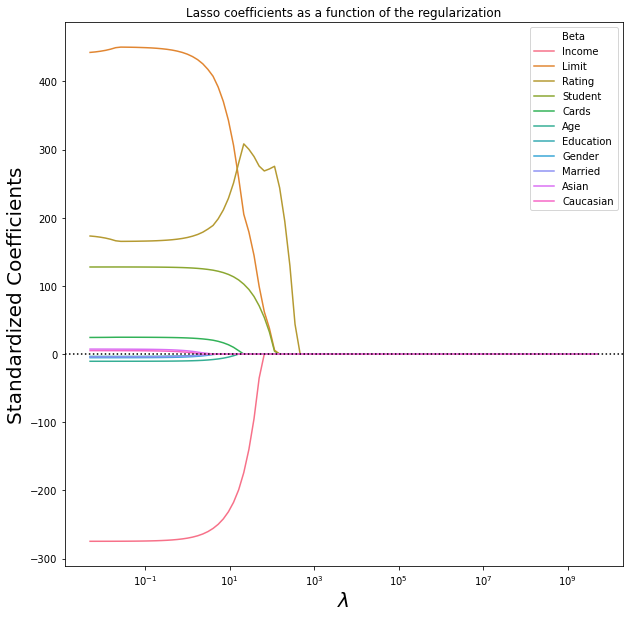

In [20]:
fig, ax =plt.subplots(1,1, figsize=(10,10))
ax = plt.gca()
sns.lineplot(x='Lambda', y='Estimate', hue='Beta',data=lasso_results)
ax.set_xscale('log')
ax.axhline(0,color='k',linestyle=":")
plt.axis('tight')
plt.xlabel(r'$\lambda$', fontsize=20)
plt.ylabel('Standardized Coefficients',fontsize=20)
plt.title('Lasso coefficients as a function of the regularization');

## Another Formulation for Ridge Regression and the Lasso
- You may have recognized something you are already familiar with as economists
- The Lasso and Ridge regressions can be written in terms of objective function (to minimize) and a constraint
 
 __Ridge__:
 \begin{gather}
 \large \min_{\mathbf{\beta}} \left\{ \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\Big)^2 \right\} \\ \large \text{subject to } \ \sum_{j=1}^p\beta_j^2 \leq s
 \end{gather}
 
 __Lasso__:
  \begin{gather}
 \large \min_{\mathbf{\beta}} \left\{ \sum_{i=1}^n \Big(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij}\Big)^2 \right\} \\ \large \text{subject to } \ \sum_{j=1}^p\left|\beta_j\right| \leq s
 \end{gather}


## Another Formulation for Ridge Regression and the Lasso, continued

- The formulas in the previous slide mean that for every value of λ, there is some s such that the constraint minization yields the same result as our first definition of Lasso and Ridge
- When p=2 (2 predictors): 
    - the lasso coefficient estimates have the smallest RSS such that $\left|\beta_1\right|+ \left|\beta_2\right| \leq s $
    - the ridge coefficient estimates have the smallest RSS such that $\beta_1^2 + \beta_2^2 \leq s$

- We can think of it as follows.
    - When we perform the Lasso or Ridge we are trying to find the set of coefficient estimates that lead to the smallest RSS, subject to the constraint that there is a budget s for how large $\sum_{j=1}^p \left|\beta_j\right|$ or 
$\sum_{j=1}^p \beta_j^2$ can be.

- If s is large the restriction is not binding (not restrictive)
- For s large enough you get the OLS estimates (which are unconstrained)

![title](lasso_ridge.png)

## OLS vs Ridge and Lasso
- In the previous slide, the OLS solution is marked as $\hat{\beta}$ and lies outside the constraint
- If s was sufficiently large, Ridge and Lasso estimates would be the same as OLS (case where $\lambda=0$)
- The ellipses that are centered around $\hat{\beta}$ represent regions of constant RSS. 
- As the ellipses expand away from the least squares coefficient estimates, the RSS increases. 
- The lasso and ridge regression coefficient estimates are given by the first point at which an ellipse contacts the constraint region. 
- Since ridge regression has a circular constraint with no sharp points, this intersection will not generally occur on an axis, and so the ridge regression coefficient estimates will be exclusively non-zero. 
- However, the lasso constraint has corners at each of the axes, and so the ellipse will often intersect the constraint region at an axis. When this occurs, one of the coefficients will equal
     - Here, the intersection occurs at β1 = 0, and so theresulting model will only include β2.

## Selecting the tuning parameter
- Since a lot seems to depend on the value of $\lambda$ which value should you choose?
- As usual, we need to remember that our end goal is to maximize out of sample prediction
- As such the right model and/or the right tuning parameter will be given by cross validation

![image.png](lasso_lambda.png)